In [158]:
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.utils.class_weight import compute_class_weight
from sklearn.tree import export_graphviz
import graphviz
import warnings
warnings.filterwarnings('ignore')

In [177]:
behavior = pd.read_csv('./data/behavior.csv', delimiter=',', index_col=False)

In [178]:
behavior.drop(columns=['pid', 'engagement_score', 'norm_engagement_score'], inplace=True)

In [179]:
behavior

,code,A/C,M/F,duration,engagement_level
0,"['Approach', 'None']",Child,Female,5680,mid
1,"['Approach', 'None']",Child,Female,11840,mid
2,"['Approach', 'None']",Child,Male,24840,mid
3,"['Approach', 'None']",Child,Male,12280,mid
4,['Pass'],Child,Male,21040,low
...,...,...,...,...,...
1116,['Pass'],Child,Female,17280,low
1117,['Pass'],Child,Female,14160,low
1118,['Pass'],Adult,Male,18080,low
1119,['Pass'],Child,Female,13840,low


In [180]:
encoding = pd.DataFrame({'orig_code':behavior['code'], 'orig_A/C':behavior['A/C'], 'orig_M/F':behavior_decoded['M/F']})

In [181]:
# Label Encoding
le = LabelEncoder()
behavior['code'] = le.fit_transform(behavior['code'])
behavior['A/C'] = le.fit_transform(behavior['A/C'])
behavior['M/F'] = le.fit_transform(behavior['M/F'])
behavior

,code,A/C,M/F,duration,engagement_level
0,53,1,0,5680,mid
1,53,1,0,11840,mid
2,53,1,1,24840,mid
3,53,1,1,12280,mid
4,101,1,1,21040,low
...,...,...,...,...,...
1116,101,1,0,17280,low
1117,101,1,0,14160,low
1118,101,0,1,18080,low
1119,101,1,0,13840,low


In [182]:
encoding['encoded_code'] = behavior['code']
encoding['encoded_A/C'] = behavior['A/C']
encoding['encoded_M/F'] = behavior['M/F']

In [183]:
encoding

,orig_code,orig_A/C,orig_M/F,encoded_code,encoded_A/C,encoded_M/F
0,"['Approach', 'None']",Child,Female,53,1,0
1,"['Approach', 'None']",Child,Female,53,1,0
2,"['Approach', 'None']",Child,Male,53,1,1
3,"['Approach', 'None']",Child,Male,53,1,1
4,['Pass'],Child,Male,101,1,1
...,...,...,...,...,...,...
1116,['Pass'],Child,Female,101,1,0
1117,['Pass'],Child,Female,101,1,0
1118,['Pass'],Adult,Male,101,0,1
1119,['Pass'],Child,Female,101,1,0


In [220]:
encoding[['orig_code', 'encoded_code']].head(20)

,orig_code,encoded_code
0,"['Approach', 'None']",53
1,"['Approach', 'None']",53
2,"['Approach', 'None']",53
3,"['Approach', 'None']",53
4,['Pass'],101
5,"['Approach', 'None']",53
6,['Pass'],101
7,['Pass'],101
8,"['Approach', 'None']",53
9,"['Approach', 'None']",53


In [195]:
# DecicionTreeClassifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

In [196]:
# 학습/검증 데이터셋 나누기
X_train, X_test, y_train, y_test = train_test_split(behavior.drop('engagement_level', axis=1), behavior['engagement_level'], test_size=0.2, random_state=42, stratify=behavior['engagement_level'])

In [208]:
len(X_train)

896

In [209]:
len(X_test)

225

In [197]:
y_train.value_counts()

mid     483
low     323
high     90
Name: engagement_level, dtype: int64

In [198]:
y_test.value_counts()

mid     121
low      81
high     23
Name: engagement_level, dtype: int64

In [199]:
# DecisionTreeClassifier 학습
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('Decision Tree 예측 정확도 : {0:.4f}'.format(accuracy))
# DecisionTreeClassifier의 하이퍼 파리미터 추출
print('\nDecisionTreeClassifier 기본 하이퍼파라미터:\n', dt_clf.get_params())

Decision Tree 예측 정확도 : 0.8889

DecisionTreeClassifier 기본 하이퍼파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 156, 'splitter': 'best'}


In [200]:
# export_graphviz( )의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함
export_graphviz(dt_clf, out_file="tree.dot", class_names = ['low', 'mid', 'high'], 
                           feature_names = ['code', 'A/C', 'M/F', 'duration'], impurity=True, filled=True)

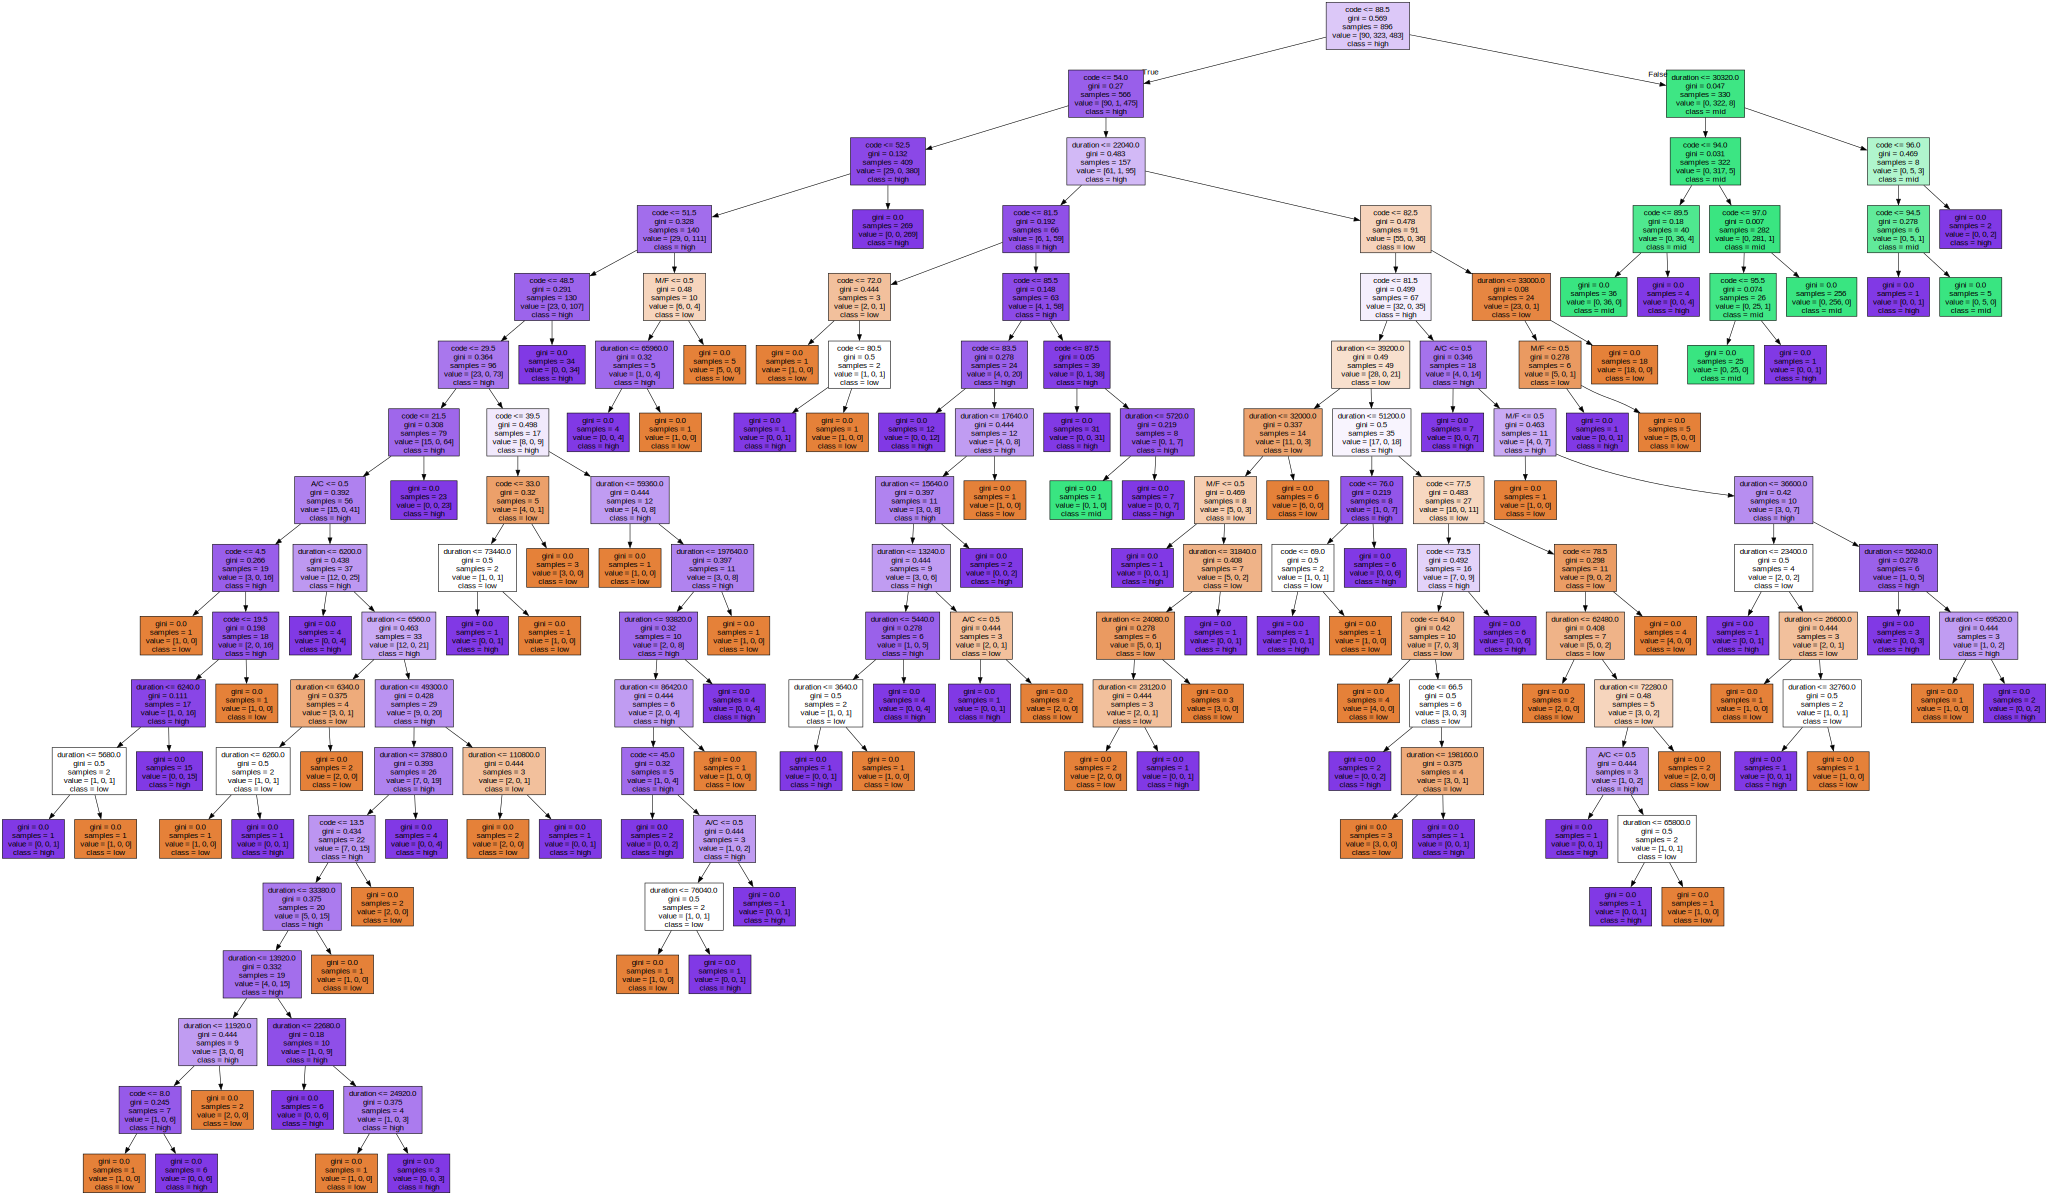

In [201]:
# 위에서 생성된 tree.dot 파일을 Graphiviz 가 읽어서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

Feature Importances:
[0.909 0.005 0.007 0.079]

code: 0.909
A/C: 0.005
M/F: 0.007
duration: 0.079


Text(0, 0.5, 'feature')

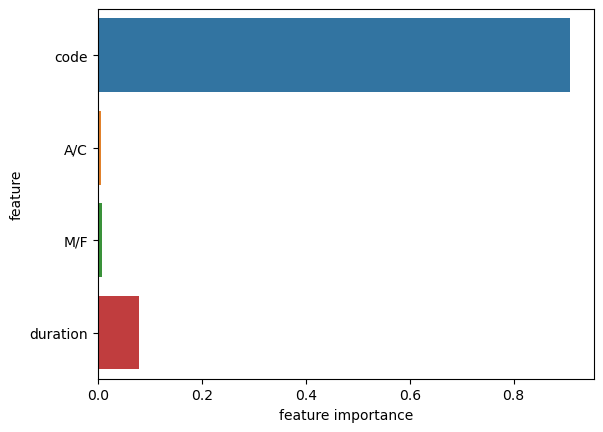

In [226]:
import seaborn as sns
%matplotlib inline

# feature importance 추출
print("Feature Importances:\n{0}\n".format(np.round(dt_clf.feature_importances_, 3)))

# feature 별 feature importance 매핑
for name, value in zip(['code', 'A/C', 'M/F', 'duration'], dt_clf.feature_importances_):
    print('{0}: {1:.3f}'.format(name, value))
    
# feature importance 시각화
g = sns.barplot(x=dt_clf.feature_importances_, y=['code', 'A/C', 'M/F', 'duration'])
g.set_xlabel('feature importance', size=10)
g.set_ylabel('feature', size=10)

===============min_samples_leaf=4인 경우의 Decision Tree 시각화==================


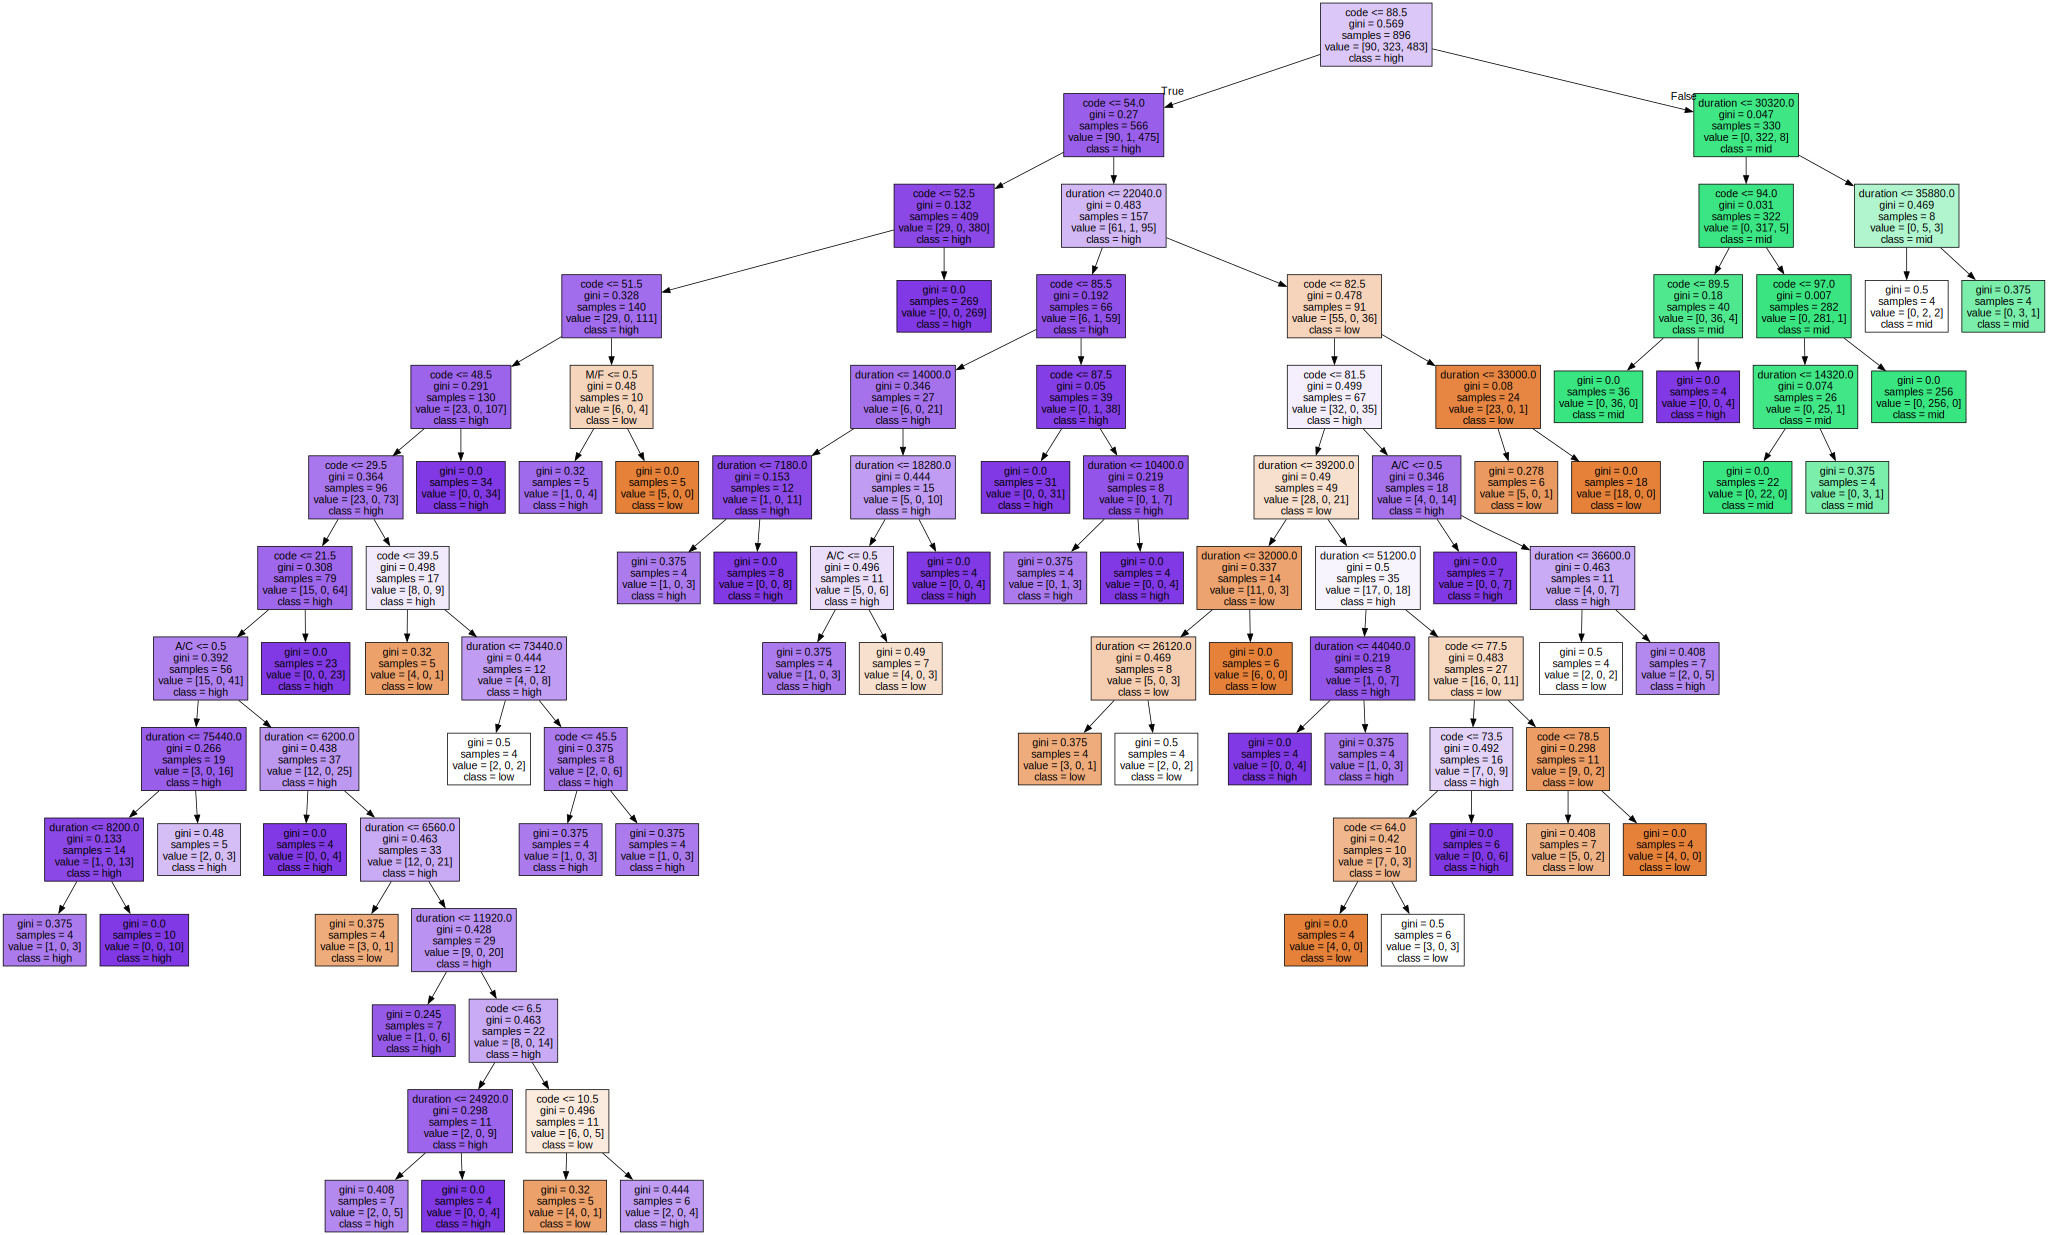

In [221]:
# DecicionTreeClassifier 생성 (min_samples_leaf=4로 상향)
dt_clf2 = DecisionTreeClassifier(min_samples_leaf=4 ,random_state=156)
dt_clf2.fit(X_train, y_train)

# export_graphviz( )의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함
export_graphviz(dt_clf2, out_file="tree2.dot", class_names = ['low', 'mid', 'high'], 
                           feature_names = ['code', 'A/C', 'M/F', 'duration'], impurity=True, filled=True)

print('===============min_samples_leaf=4인 경우의 Decision Tree 시각화==================')
import graphviz
# 위에서 생성된 tree.dot 파일을 Graphiviz 가 읽어서 시각화
with open("tree2.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [206]:
pred = dt_clf2.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('Decision Tree 예측 정확도 : {0:.4f}'.format(accuracy))

Decision Tree 예측 정확도 : 0.8711


Feature Importances:
[0.909 0.005 0.007 0.079]

code: 0.909
A/C: 0.005
M/F: 0.007
duration: 0.079


<Axes: >

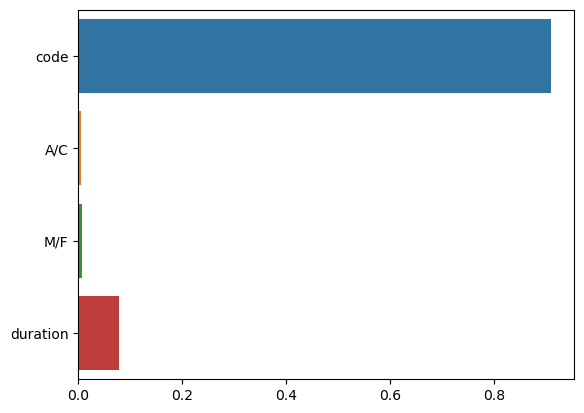

In [207]:
import seaborn as sns
%matplotlib inline

# feature importance 추출
print("Feature Importances:\n{0}\n".format(np.round(dt_clf2.feature_importances_, 3)))

# feature 별 feature importance 매핑
for name, value in zip(['code', 'A/C', 'M/F', 'duration'], dt_clf2.feature_importances_):
    print('{0}: {1:.3f}'.format(name, value))
    
# feature importance 시각화
sns.barplot(x=dt_clf2.feature_importances_, y=['code', 'A/C', 'M/F', 'duration'])